In [1]:
import pandas as pd
import datetime
import matrixprofile.matrixProfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

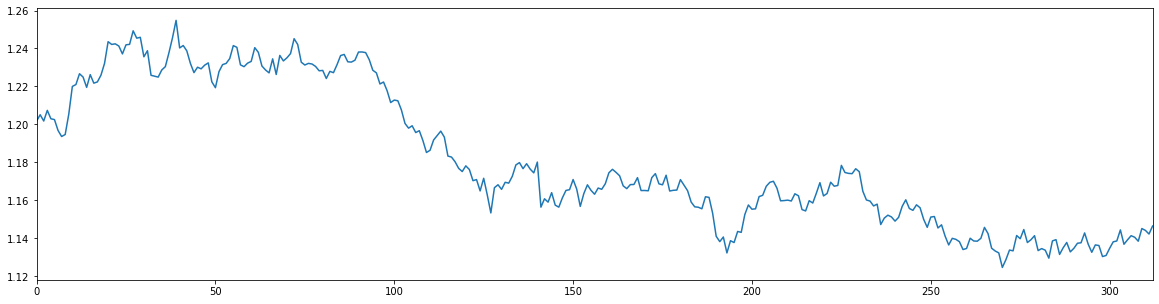

In [2]:
df = pd.read_csv('close.csv', index_col='datetime')
df.index = pd.to_datetime(df.index)
df = df.resample('D').last()
df = df[~df['close'].isna()]
df.reset_index(inplace=True)
df.close.plot(figsize=(20,5));

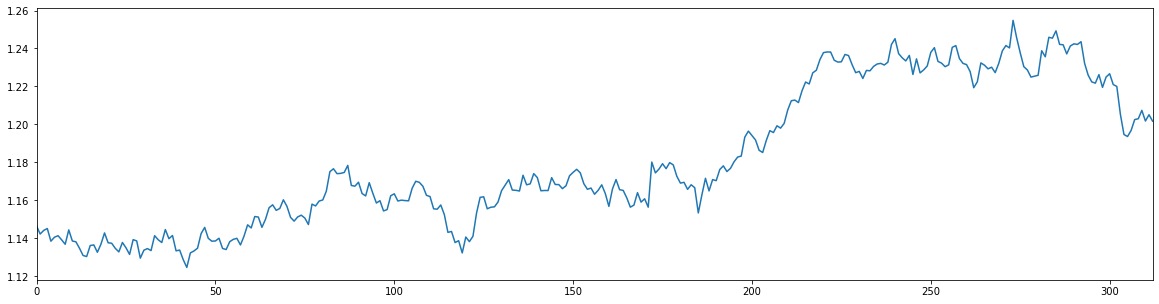

In [3]:
df_rev = df.copy()
df_rev = df_rev.iloc[::-1]
df_rev.reset_index(inplace=True)
df_rev.close.plot(figsize=(20,5));

In [4]:
df_rev['week_number'] = df_rev['datetime'].dt.week
minima = df_rev.loc[df_rev.groupby('week_number')['close'].idxmin()]
minima.head()

,index,datetime,close,week_number
0,312,2018-12-31,1.14644,1
305,7,2018-01-09,1.19361,2
298,14,2018-01-17,1.21950,3
294,18,2018-01-22,1.22593,4
288,24,2018-01-29,1.23714,5


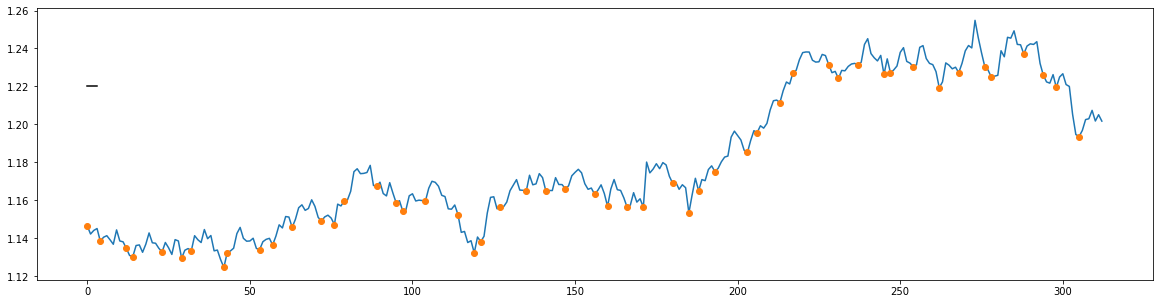

In [5]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(range(len(df_rev)), df_rev['close']);
plt.plot(minima.index.values, minima['close'], 'o');
plt.plot(range(4), [1.22] * 4, 'k');

In [6]:
m = 4
m_profile, m_index = matrixprofile.matrixProfile.stomp(df_rev['close'].values, m)
df_rev['profile'] = np.append(m_profile, np.zeros(m-1) + np.nan)
df_rev['profile_index'] = np.append(m_index, np.zeros(m - 1) + np.nan)

In [7]:
minima.index.values

array([  0, 305, 298, 294, 288, 278, 276, 268, 262, 254, 247, 245, 237,
       231, 228, 217, 213, 206, 203, 193, 188, 185, 180, 171, 166, 160,
       156, 147, 141, 135, 127, 121, 119, 114, 104,  97,  95,  89,  79,
        76,  72,  63,  57,  53,  43,  42,  32,  29,  23,  14,  12,   4])

In [8]:
minima.head()

,index,datetime,close,week_number
0,312,2018-12-31,1.14644,1
305,7,2018-01-09,1.19361,2
298,14,2018-01-17,1.21950,3
294,18,2018-01-22,1.22593,4
288,24,2018-01-29,1.23714,5


In [9]:
temp = df_rev[df_rev.index.isin(minima.index.values)]['profile_index']

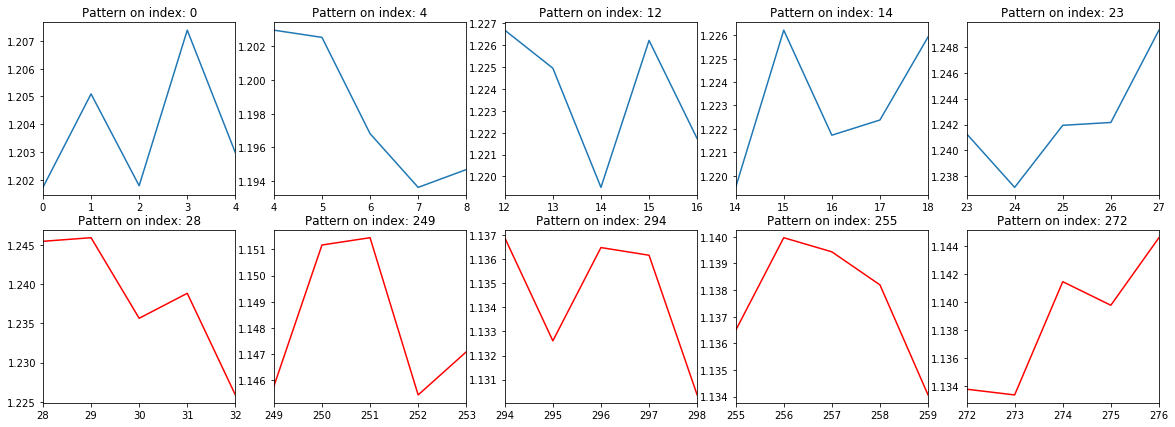

In [10]:
n = 5
pairs = {}
temp = df_rev[df_rev.index.isin(minima.index.values)]['profile_index']

for idx, profile_index in temp.iteritems():
    if len(pairs) >= 2 * n:
        break
    profile_index = int(profile_index)
    pairs[idx] = profile_index
    pairs[profile_index] = idx
    
fig, axs = plt.subplots(2, n, sharex=False, figsize=(20,7))

seen = set()
i = 0
for idx1, idx2 in pairs.items():
    if idx1 in seen or idx2 in seen:
        continue

    df.loc[idx1:idx1+m]['close'].plot(ax=axs[0,i], title='Pattern on index: {}'.format(idx1))
    df.loc[idx2:idx2+m]['close'].plot(ax=axs[1,i], c='r', title='Pattern on index: {}'.format(idx2))

    seen.add(idx1)
    seen.add(idx2)
    i += 1
plt.show()

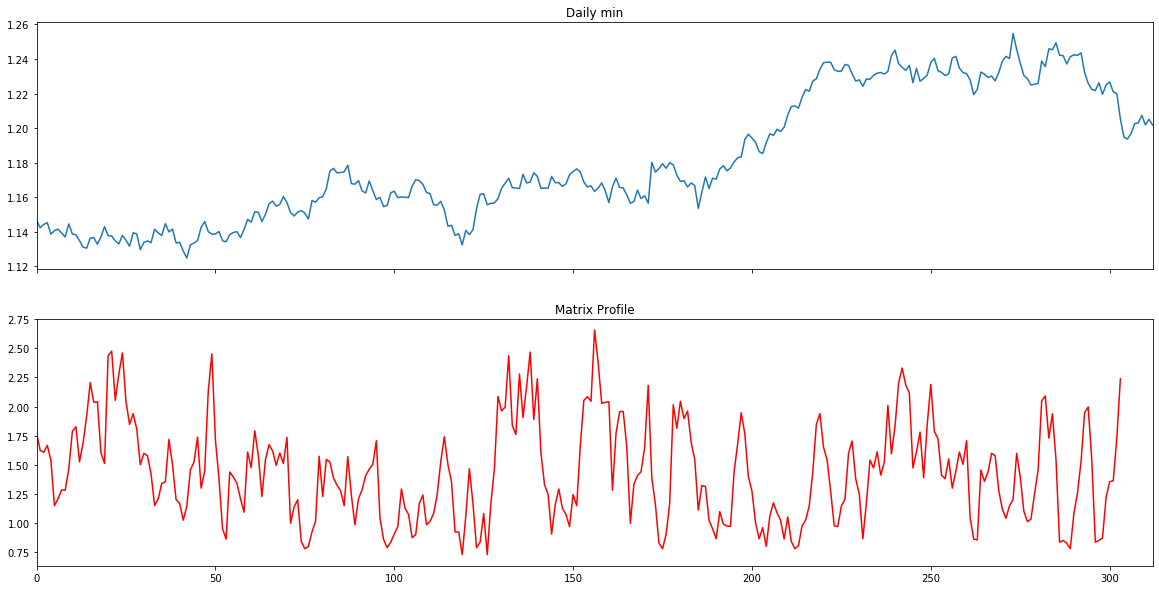

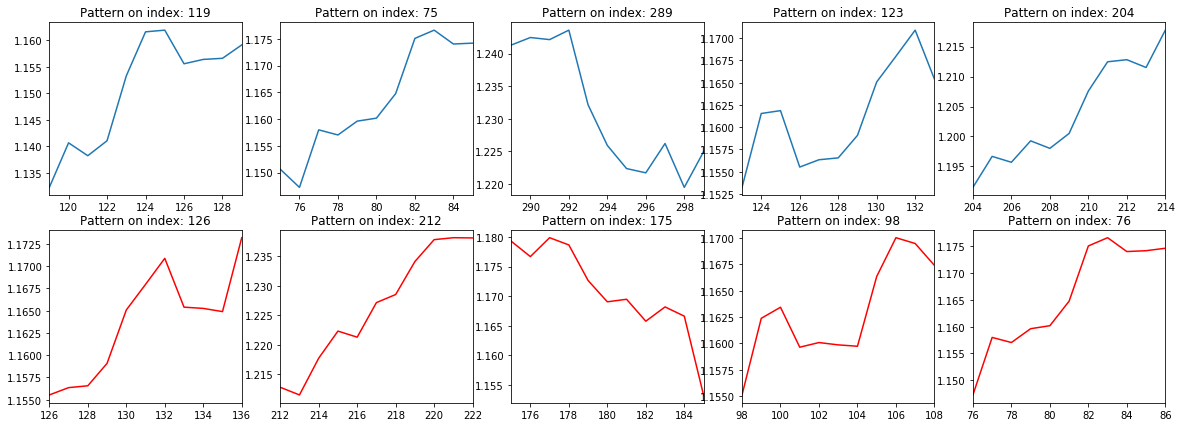

In [11]:
m = 10
profile = matrixprofile.matrixProfile.stomp(df_rev['close'].values, m)
df_rev['profile'] = np.append(profile[0], np.zeros(m-1) + np.nan)
df_rev['profile_index'] = np.append(profile[1], np.zeros(m - 1) + np.nan)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))
df_rev['close'].plot(ax=ax1, title='Daily min')
df_rev['profile'].plot(ax=ax2, c='r', title='Matrix Profile')
plt.show()

df_rev = df_rev[~df_rev['profile_index'].isna()]
df_rev.sort_values('profile').head()

n = 5
pairs = {}
temp = df_rev.sort_values('profile')['profile_index']

for idx, profile_index in temp.iteritems():
    if len(pairs) >= 2 * n:
        break
    profile_index = int(profile_index)
    pairs[idx] = profile_index
    pairs[profile_index] = idx
    
fig, axs = plt.subplots(2, n, sharex=False, figsize=(20,7))

seen = set()
i = 0
for idx1, idx2 in pairs.items():
    if idx1 in seen or idx2 in seen:
        continue

    df_rev.loc[idx1:idx1+m]['close'].plot(ax=axs[0,i], title='Pattern on index: {}'.format(idx1))
    df_rev.loc[idx2:idx2+m]['close'].plot(ax=axs[1,i], c='r', title='Pattern on index: {}'.format(idx2))

    seen.add(idx1)
    seen.add(idx2)
    i += 1
plt.show()